In [942]:
import numpy as np
import pandas as pd

#data viz
import matplotlib.pyplot as plt
import seaborn as sns

#####
from statsmodels.graphics.correlation import plot_corr
from scipy import stats

In [943]:
traindf = pd.read_csv("./df_train.csv")
#show first 5 rows of the df
traindf.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [944]:
testdf = pd.read_csv('./df_test.csv')
testdf.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [945]:
df= pd.concat([traindf,testdf])
df.head()


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [946]:
### remove Unnamed column
df = df.drop(['Unnamed: 0'], axis=1)

In [947]:
# fig = plt.figure(figsize = (15,15))
# axes = fig.add_subplot(111)
# plot_corr(df.corr(), xnames = df.corr().columns, ax = axes)
# plt.show()


C:\Users\lefak\AppData\Local\Temp\ipykernel_15740\2985498943.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

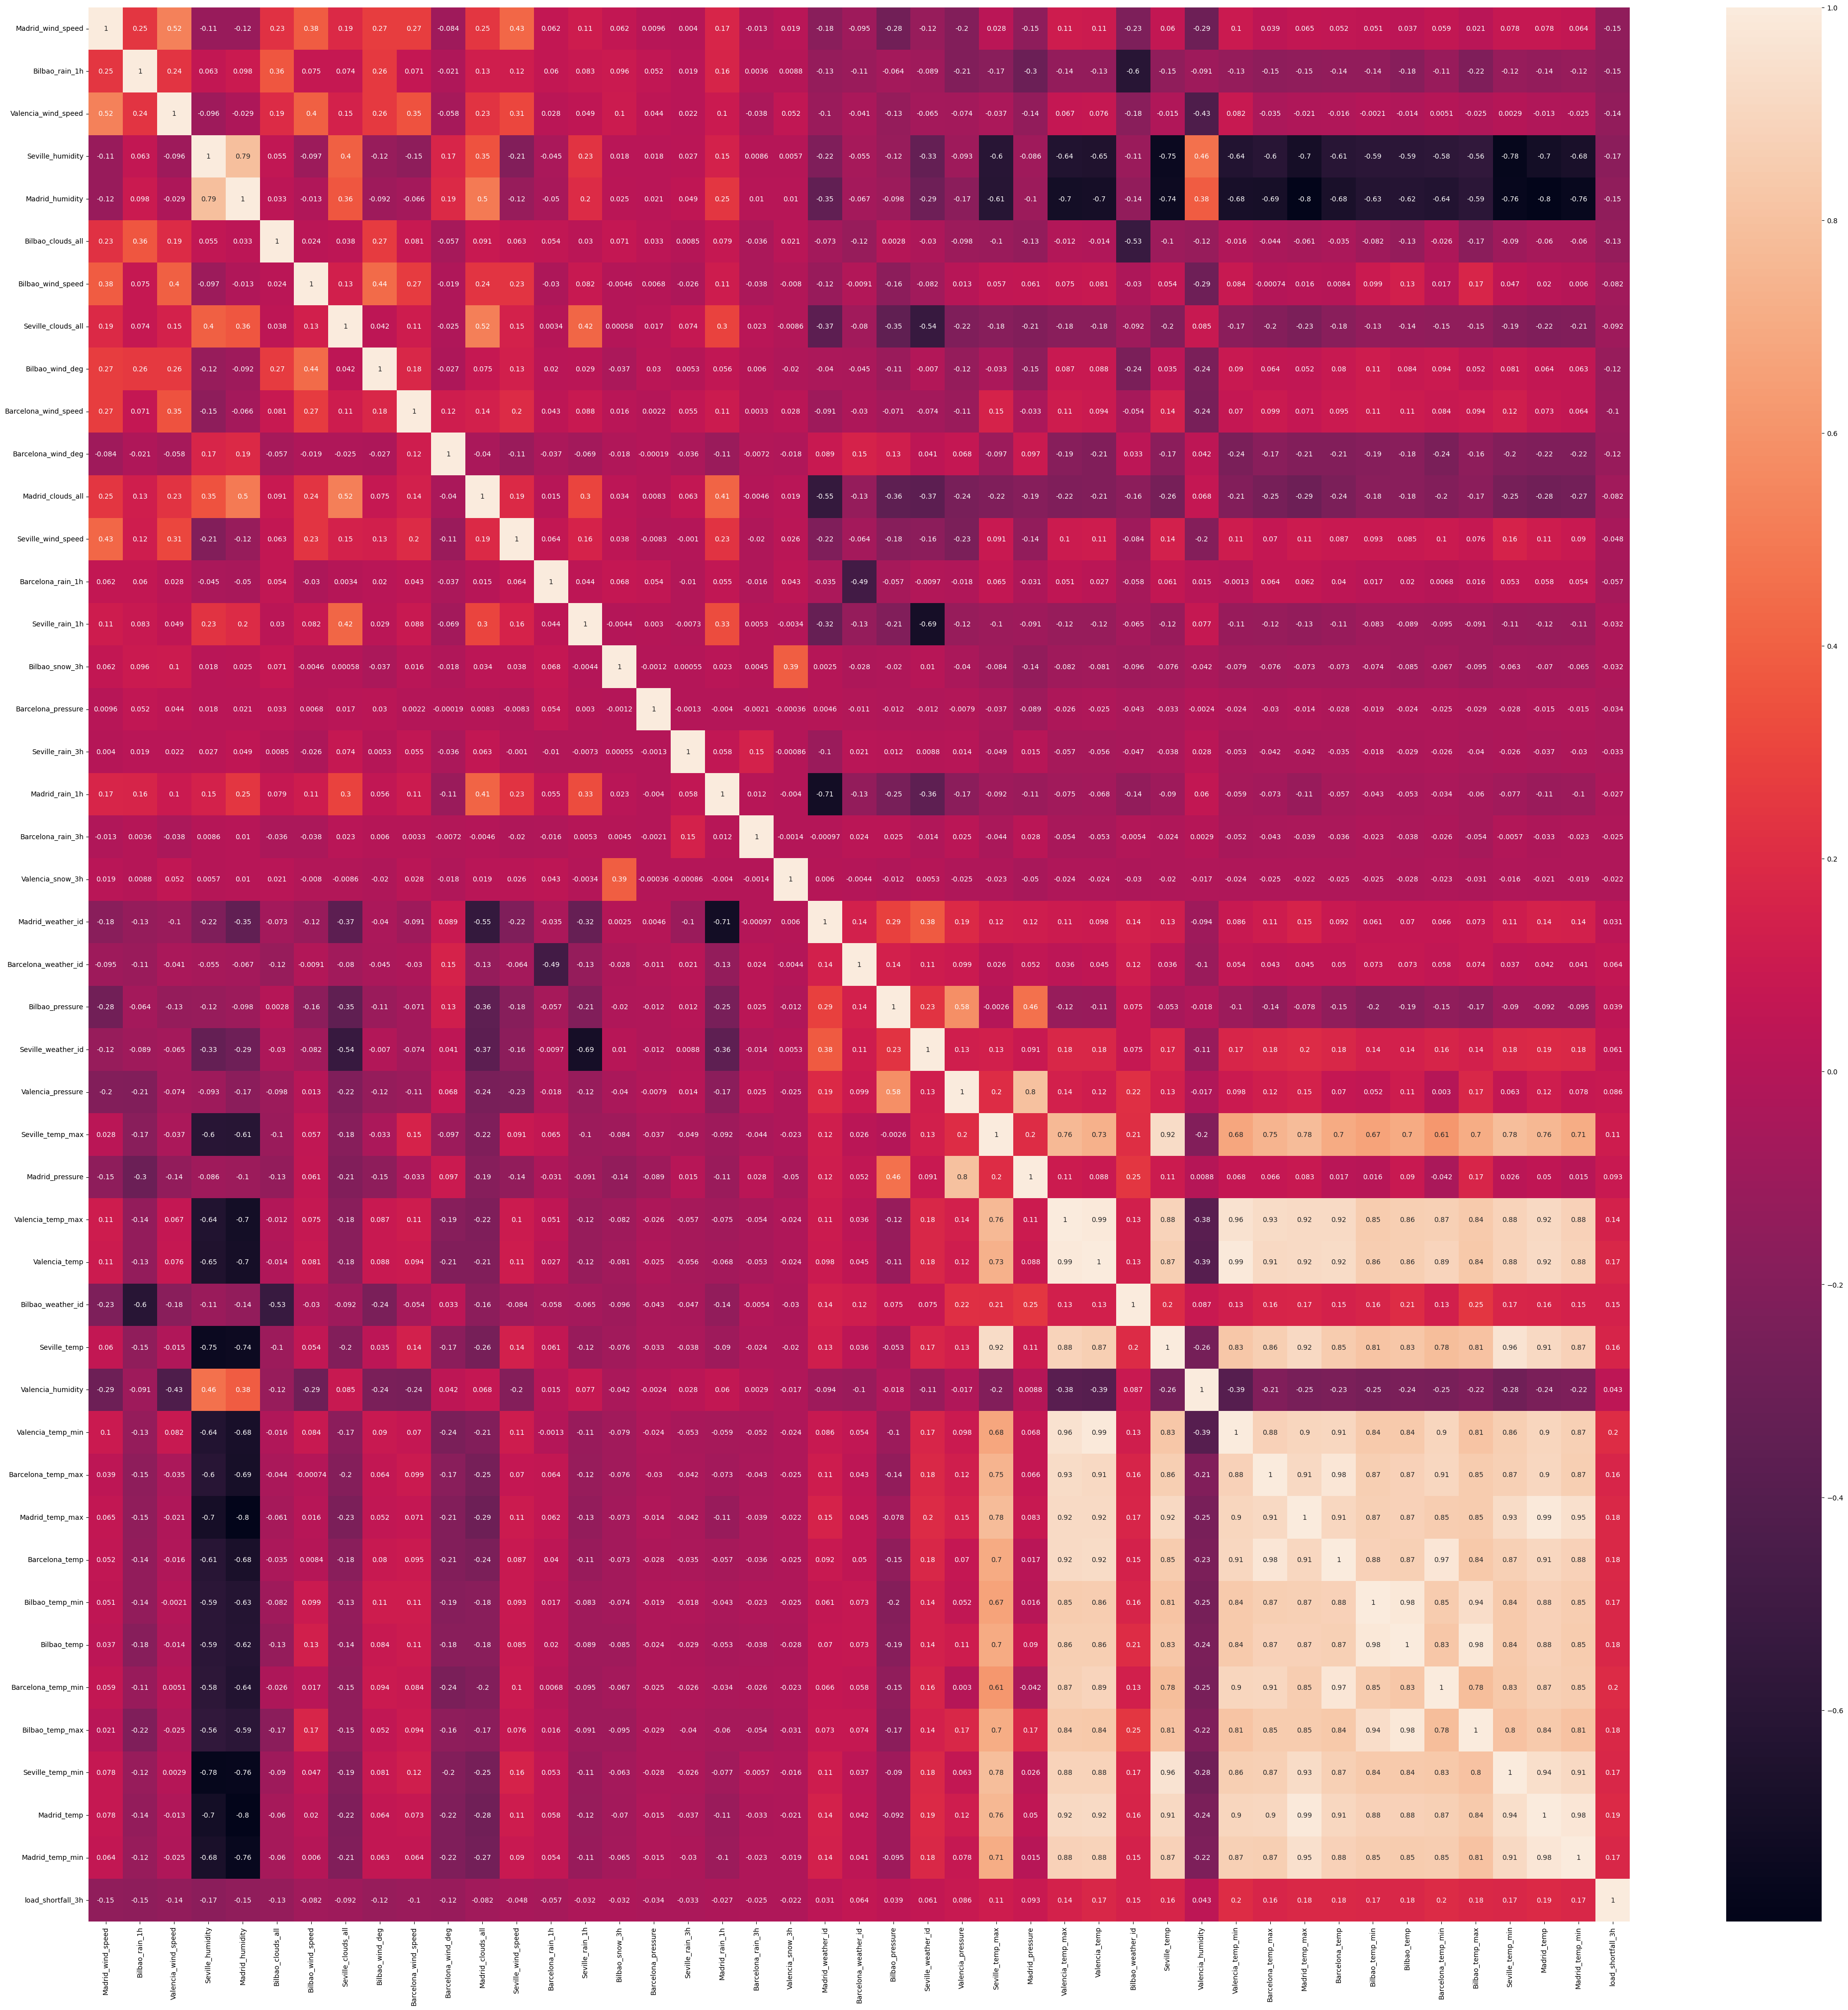

In [948]:
fig, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True)

In [949]:
df.shape

(11683, 48)

In [950]:
df.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

### Cities

In [951]:
Madrid = df[['Madrid_wind_speed', 
               'Madrid_humidity',
               'Madrid_clouds_all',
                 'Madrid_pressure',
                  'Madrid_rain_1h',
                   'Madrid_weather_id', 
                   'Madrid_temp_min',
                   'Madrid_temp',
                   'Madrid_temp_max']].copy()

### remove outliers
# Madrid[(np.abs(stats.zscore(Madrid)) < 3).all(axis=1)]

Madrid.head()
# Madrid.info()





,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_pressure,Madrid_rain_1h,Madrid_weather_id,Madrid_temp_min,Madrid_temp,Madrid_temp_max
0,0.666667,64.000000,0.0,971.333333,0.0,800.0,265.938000,265.938000,265.938000
1,0.333333,64.666667,0.0,972.666667,0.0,800.0,266.386667,266.386667,266.386667
2,1.000000,64.333333,0.0,974.000000,0.0,800.0,272.708667,272.708667,272.708667
3,1.000000,56.333333,0.0,994.666667,0.0,800.0,281.895219,281.895219,281.895219
4,1.000000,57.000000,0.0,1035.333333,0.0,800.0,280.678437,280.678437,280.678437


In [952]:
Seville = df[['Seville_humidity',
                 'Seville_clouds_all',
                   'Seville_wind_speed',
                'Seville_pressure', 
                'Seville_rain_1h',
                 'Seville_rain_3h',
                 'Seville_weather_id',
                 'Seville_temp_max',
                 'Seville_temp',
                 'Seville_temp_min']].copy()

### reformatting the data to the correct type
Seville['Seville_pressure'] = Seville['Seville_pressure'].astype(str).str.extract('(\d+)', expand=False).astype(int)



# ### remove outliers
# Seville[(np.abs(stats.zscore(Seville)) < 3).all(axis=1)]

# Seville.head()
# Seville.info()




In [953]:
Barcelona = df[[ 'Barcelona_wind_speed',
       'Barcelona_wind_deg',
         'Barcelona_rain_1h', 
        'Barcelona_pressure', 
        'Barcelona_rain_3h',
        'Barcelona_weather_id', 
        'Barcelona_temp_max',
          'Barcelona_temp',
       'Barcelona_temp_min']].copy()

### remove outliers
# Seville[(np.abs(stats.zscore(Seville)) < 3).all(axis=1)]

Barcelona.head() 
# Barcelona.info()



,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_rain_1h,Barcelona_pressure,Barcelona_rain_3h,Barcelona_weather_id,Barcelona_temp_max,Barcelona_temp,Barcelona_temp_min
0,6.333333,42.666667,0.0,1036.333333,0.0,800.0,281.013000,281.013000,281.013000
1,4.000000,139.000000,0.0,1037.333333,0.0,800.0,280.561667,280.561667,280.561667
2,2.000000,326.000000,0.0,1038.000000,0.0,800.0,281.583667,281.583667,281.583667
3,2.333333,273.000000,0.0,1037.000000,0.0,800.0,283.434104,283.434104,283.434104
4,4.333333,260.000000,0.0,1035.000000,0.0,800.0,284.213167,284.213167,284.213167


In [954]:
Valencia = df[['Valencia_wind_speed',
               'Valencia_wind_deg',
               'Valencia_humidity',
                'Valencia_snow_3h',
                'Valencia_pressure',
              'Valencia_temp_max',
               'Valencia_temp',
               'Valencia_temp_min']].copy()

### reformatting the data to the correct type
Valencia['Valencia_wind_deg'] = Valencia['Valencia_wind_deg'].astype(str).str.extract('(\d+)', expand=False).astype(int)




### Valencia_pressure has 2068 out of 8763 total values missing
Valencia['Valencia_pressure'].fillna(Valencia['Valencia_pressure'].median(), inplace=True) # mean = 1012.0514065222798  , mode = 1018 , median = 1015

Valencia.head()
# Valencia.info()




,Valencia_wind_speed,Valencia_wind_deg,Valencia_humidity,Valencia_snow_3h,Valencia_pressure,Valencia_temp_max,Valencia_temp,Valencia_temp_min
0,0.666667,5,75.666667,0.0,1002.666667,269.888000,269.888000,269.888000
1,1.666667,10,71.000000,0.0,1004.333333,271.728333,271.728333,271.728333
2,1.000000,9,65.666667,0.0,1005.333333,278.008667,278.008667,278.008667
3,1.000000,8,54.000000,0.0,1009.000000,284.899552,284.899552,284.899552
4,1.000000,7,58.333333,0.0,1015.000000,283.015115,283.015115,283.015115


In [955]:
Bilbao = df[['Bilbao_wind_speed',
             'Bilbao_wind_deg',
             'Bilbao_clouds_all',
             'Bilbao_pressure',
               'Bilbao_rain_1h',
               'Bilbao_snow_3h',
               'Bilbao_weather_id',
             'Bilbao_temp_max',
             'Bilbao_temp',
             'Bilbao_temp_min']]
Bilbao.head()

Bilbao.describe().T






,count,mean,std,min,25%,50%,75%,max
Bilbao_wind_speed,11683.0,1.958629,1.696043,0.000000,1.000000,1.333333,2.666667,12.666667
Bilbao_wind_deg,11683.0,159.878855,101.005654,0.000000,76.666667,145.666667,233.333333,360.000000
Bilbao_clouds_all,11683.0,43.440712,32.046215,0.000000,12.000000,45.000000,75.000000,100.000000
Bilbao_pressure,11683.0,1017.482011,9.753552,971.333333,1013.333333,1018.666667,1023.333333,1042.000000
Bilbao_rain_1h,11683.0,0.118698,0.334918,0.000000,0.000000,0.000000,0.100000,3.000000
Bilbao_snow_3h,11683.0,0.023936,0.482817,0.000000,0.000000,0.000000,0.000000,21.300000
Bilbao_weather_id,11683.0,727.800750,113.616789,207.333333,701.000000,800.000000,801.666667,804.000000
Bilbao_temp_max,11683.0,288.095397,6.898601,269.063000,283.150000,287.816667,292.483333,317.966667
Bilbao_temp,11683.0,286.447784,6.738466,267.483333,281.483448,286.193333,291.040000,310.710000
Bilbao_temp_min,11683.0,284.993657,6.730076,264.483333,280.122526,284.816667,289.816667,309.816667


In [956]:
Bilbao

,Bilbao_wind_speed,Bilbao_wind_deg,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_weather_id,Bilbao_temp_max,Bilbao_temp,Bilbao_temp_min
0,1.000000,223.333333,0.000000,1035.000000,0.0,0.0,800.000000,269.338615,269.338615,269.338615
1,1.000000,221.000000,0.000000,1035.666667,0.0,0.0,800.000000,270.376000,270.376000,270.376000
2,1.000000,214.333333,0.000000,1036.000000,0.0,0.0,800.000000,275.027229,275.027229,275.027229
3,1.000000,199.666667,0.000000,1036.000000,0.0,0.0,800.000000,281.135063,281.135063,281.135063
4,0.333333,185.000000,2.000000,1035.333333,0.0,0.0,800.000000,282.252063,282.252063,282.252063
...,...,...,...,...,...,...,...,...,...,...
2915,1.333333,70.000000,80.000000,1034.666667,0.0,0.0,734.333333,276.150000,273.210000,270.816667
2916,1.000000,36.666667,56.666667,1034.333333,0.0,0.0,747.666667,278.816667,278.443333,278.150000
2917,0.666667,14.666667,0.000000,1033.000000,0.0,0.0,800.000000,285.816667,285.073333,284.150000
2918,0.666667,19.000000,0.000000,1033.333333,0.0,0.0,800.000000,282.816667,281.626667,280.150000


<Axes: >

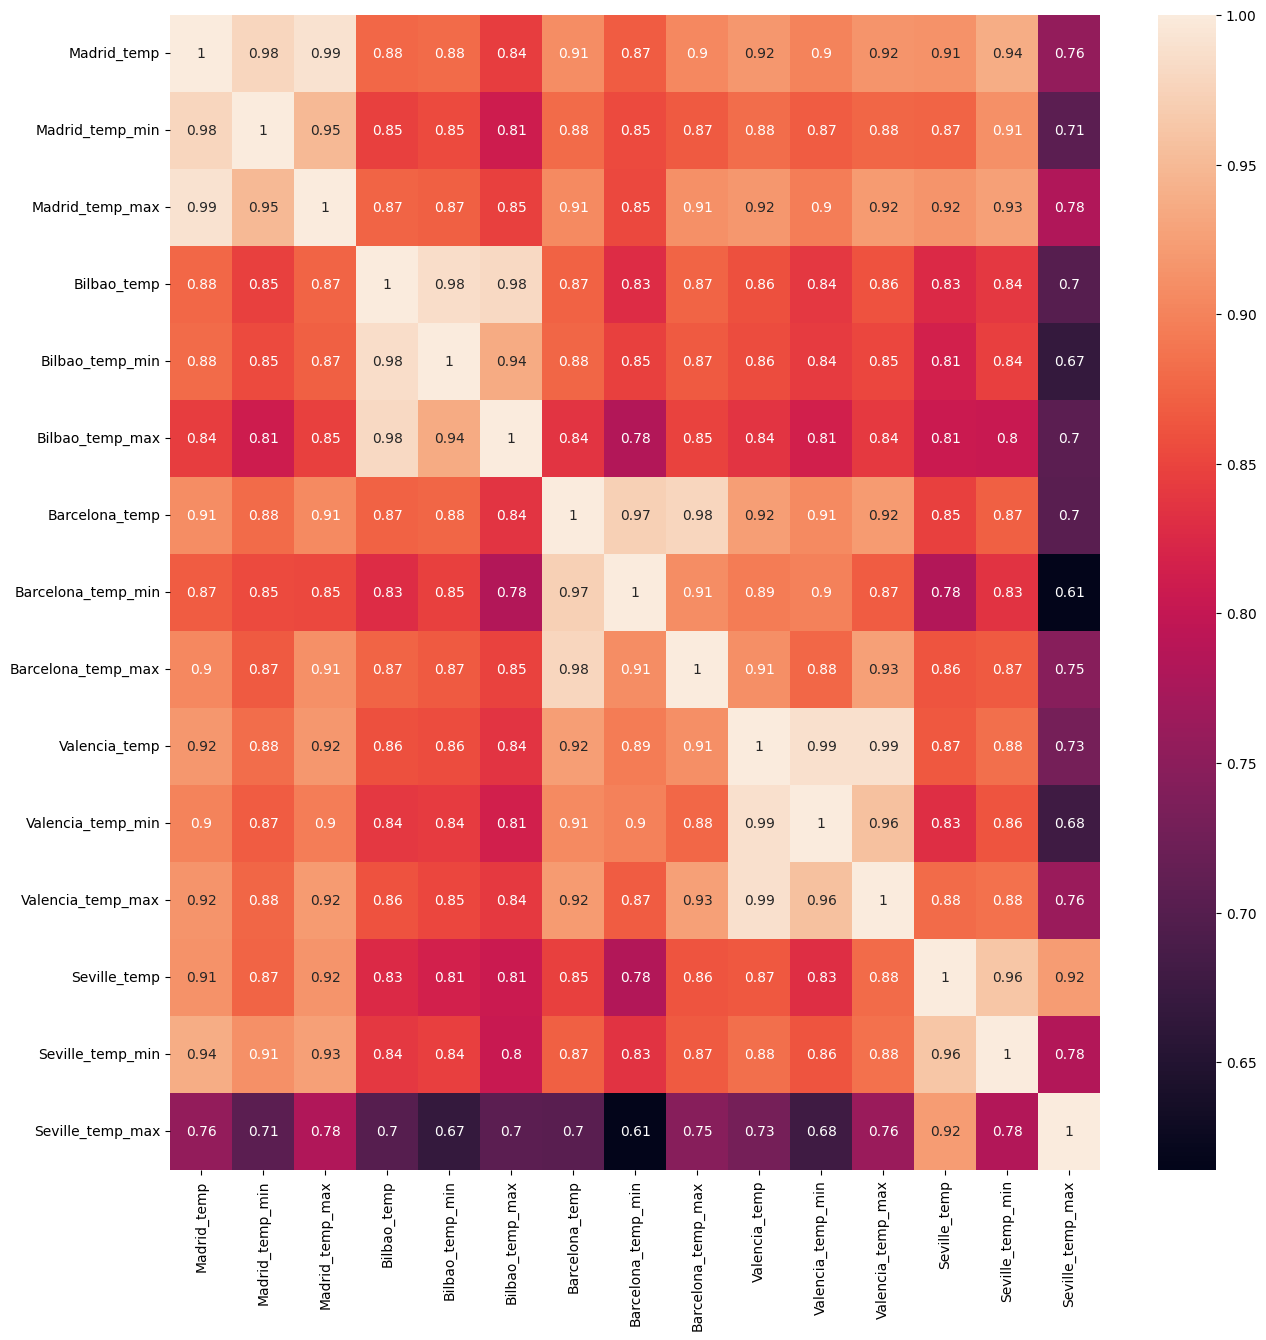

In [957]:

Train = df[['Madrid_temp','Madrid_temp_min','Madrid_temp_max',
           'Bilbao_temp','Bilbao_temp_min','Bilbao_temp_max',
           'Barcelona_temp','Barcelona_temp_min','Barcelona_temp_max',
           'Valencia_temp','Valencia_temp_min','Valencia_temp_max',
           'Seville_temp','Seville_temp_min','Seville_temp_max']].copy()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(Train.corr(), annot=True)


<Axes: >

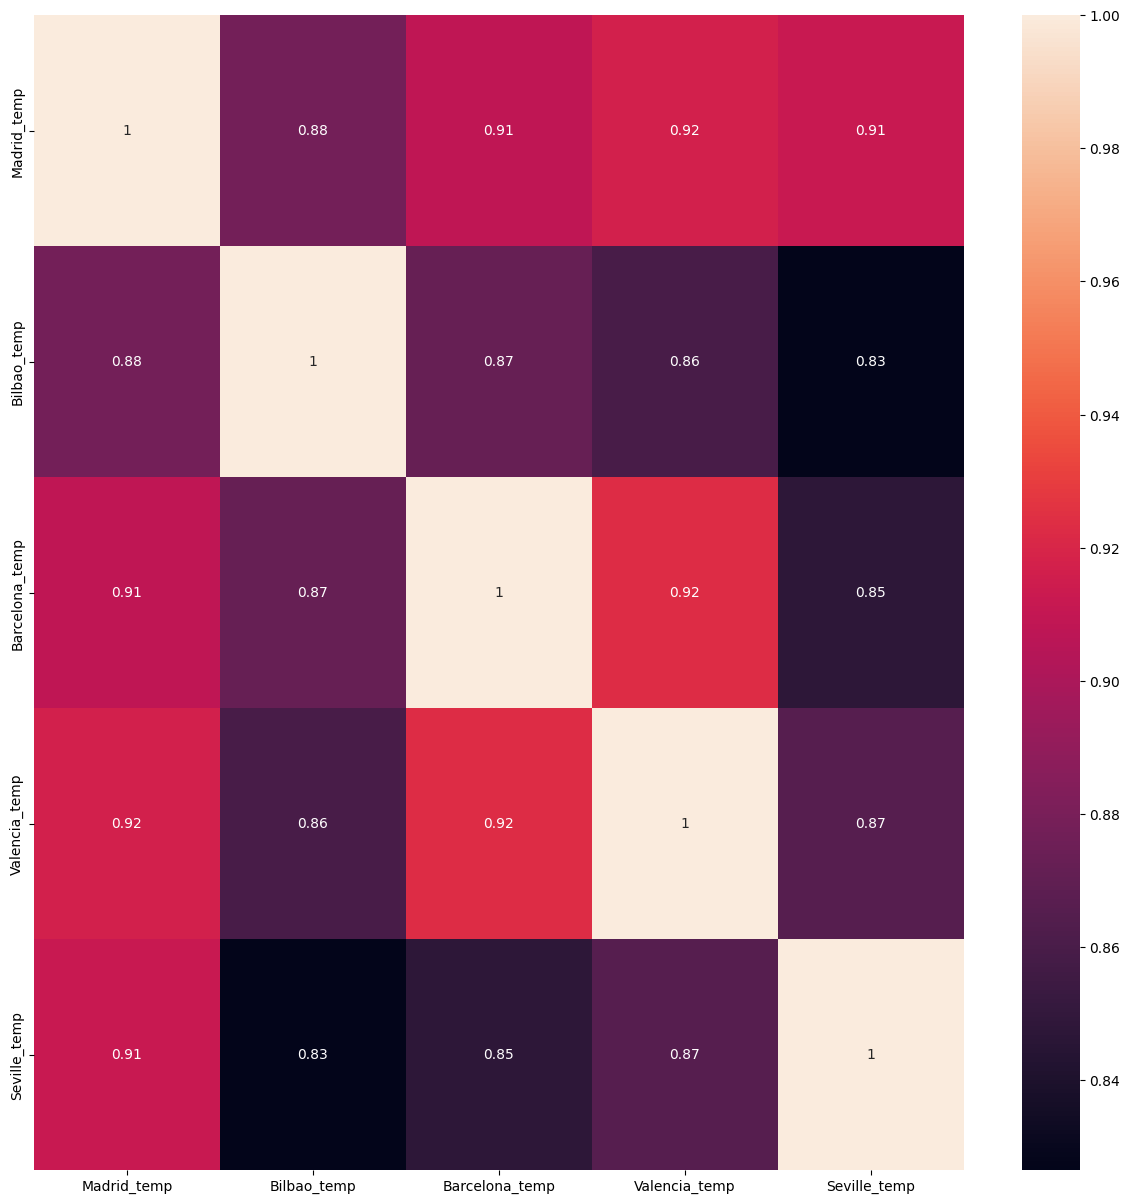

In [958]:
Temp1 = df[['Madrid_temp',
           'Bilbao_temp',
           'Barcelona_temp',
           'Valencia_temp',
           'Seville_temp']].copy()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(Temp1.corr(), annot=True)

In [962]:
data = pd.concat([df['time'],Madrid, Seville, Barcelona, Valencia, Bilbao,df['load_shortfall_3h']], axis=1)
data.shape





(11683, 48)

In [960]:
Train = data.copy() 

Train['time'] = pd.to_datetime(Train['time'])

Train['Day'] = Train['time'].dt.day
Train['Month'] = Train['time'].dt.month
Train['Year'] = Train['time'].dt.year
Train['Hour'] = Train['time'].dt.hour

Train = Train [['Year','Month','Day','Hour','Madrid_wind_speed', 'Madrid_humidity', 'Madrid_clouds_all',
       'Madrid_pressure', 'Madrid_rain_1h', 'Madrid_weather_id', 'Madrid_temp',
       'Seville_humidity', 'Seville_clouds_all', 'Seville_wind_speed',
       'Seville_pressure', 'Seville_rain_1h', 'Seville_rain_3h',
       'Seville_weather_id', 'Seville_temp', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Barcelona_rain_1h', 'Barcelona_pressure',
       'Barcelona_rain_3h', 'Barcelona_weather_id', 'Barcelona_temp',
       'Valencia_wind_speed', 'Valencia_wind_deg', 'Valencia_humidity',
       'Valencia_snow_3h', 'Valencia_pressure', 'Valencia_temp',
       'Bilbao_wind_speed', 'Bilbao_wind_deg', 'Bilbao_clouds_all',
       'Bilbao_pressure', 'Bilbao_rain_1h', 'Bilbao_snow_3h',
       'Bilbao_weather_id', 'Bilbao_temp','load_shortfall_3h']]



Train.describe().T
Train.shape


(11683, 41)

In [961]:
from sklearn.preprocessing import MinMaxScaler

# # Create an instance of the MinMaxScaler
# scaler = MinMaxScaler()
# Temp = Train.copy()
# Temp = Temp.drop(['load_shortfall_3h'], axis=1)
# # Scale the independent variables and create a DataFrame

# Temp = pd.DataFrame(scaler.fit_transform(Temp), columns=Temp.columns)
# Temp.head()
# Temp.shape

# # Train = pd.concat([Temp[Temp.columns],Train['load_shortfall_3h']], axis=1)
# Train =pd.concat([Temp[Temp.columns],Train['load_shortfall_3h']], axis=1)
# Train.head()


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
# Train.kurtosis(numeric_only=True)

In [ ]:
# from scipy.stats import trimboth
# # trimmed_data = trimboth(df['column_name'], proportiontocut=0.05)
# # df['column_name'] = trimmed_data

# for i in Train.columns:
#     trimmed_data = trimboth(Train[i], proportiontocut=0.05)
#     Train[i] = trimmed_data

# Train.head()

from scipy.stats.mstats import winsorize 
# handling outliers by replacing them 
for i in Train.columns:
    winsorized_data = winsorize(Train[i], limits=(0.05, 0.05))
    Train[i] = winsorized_data

# # # ### handling outliers by removing them
# Train = Train.join(df['load_shortfall_3h'], how='outer') 
# for i in Train.columns:
#     if i == 'load_shortfall_3h':
#         continue
# # Calculate the IQR for a specific column
#     Q1 = Train[i].quantile(0.25)
#     Q3 = Train[i].quantile(0.75)
#     IQR = Q3 - Q1

# # Set a threshold
#     threshold = 1.5
# # Filter and remove outliers from the DataFrame
#     Train = Train[(Train[i] >= Q1 - threshold * IQR) & (Train[i] <= Q3 + threshold * IQR)]


Train.describe().T
Train.shape



C:\Users\lefak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\lefak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\lefak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\lefak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partiti

(11683, 41)

In [ ]:
###removing columns with low variance
# from sklearn.feature_selection import VarianceThreshold
# sel = VarianceThreshold(threshold=0.1)
# sel.fit_transform(Train)
# Train.columns[sel.get_support(indices=True)]
# Train = Train[Train.columns[sel.get_support(indices=True)]]
# Train.describe().T
# Train.shape




In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## mitigate multicollinearity
Temp = Train.copy()
Temp = Temp.drop(['load_shortfall_3h'], axis=1)
# Add a constant column to the predictor variables for the intercept term
Temp = sm.add_constant(Temp)

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()

# Calculate the VIF for each predictor variable
vif_data['Variable'] = Temp.columns
vif_data['VIF'] = [variance_inflation_factor(Temp.values, i) for i in range(Temp.shape[1])]

# Exclude columns with VIF greater than 10
columns_to_exclude = vif_data[vif_data['VIF'] > 10]['Variable']
Temp= Temp.drop(columns_to_exclude, axis=1)

Train =pd.concat([Train[Temp.columns],Train['load_shortfall_3h']], axis=1)
Train.columns


C:\Users\lefak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Index(['Year', 'Month', 'Day', 'Hour', 'Madrid_wind_speed', 'Madrid_humidity',
       'Madrid_clouds_all', 'Madrid_pressure', 'Madrid_rain_1h',
       'Madrid_weather_id', 'Seville_humidity', 'Seville_clouds_all',
       'Seville_wind_speed', 'Seville_pressure', 'Seville_rain_1h',
       'Seville_rain_3h', 'Seville_weather_id', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Barcelona_rain_1h', 'Barcelona_pressure',
       'Barcelona_rain_3h', 'Barcelona_weather_id', 'Valencia_wind_speed',
       'Valencia_wind_deg', 'Valencia_humidity', 'Valencia_snow_3h',
       'Valencia_pressure', 'Bilbao_wind_speed', 'Bilbao_wind_deg',
       'Bilbao_clouds_all', 'Bilbao_pressure', 'Bilbao_rain_1h',
       'Bilbao_snow_3h', 'Bilbao_weather_id', 'Bilbao_temp',
       'load_shortfall_3h'],
      dtype='object')

In [ ]:
Train.shape

(11683, 37)

In [ ]:
###Accesing train data
X = Train[:len(traindf)].drop(['load_shortfall_3h'], axis=1)
x_test = Train[len(traindf):].drop(['load_shortfall_3h'], axis=1)
Y  = Train[:len(traindf)][['load_shortfall_3h']]
X.head()
X.shape

(8763, 36)

<Axes: >

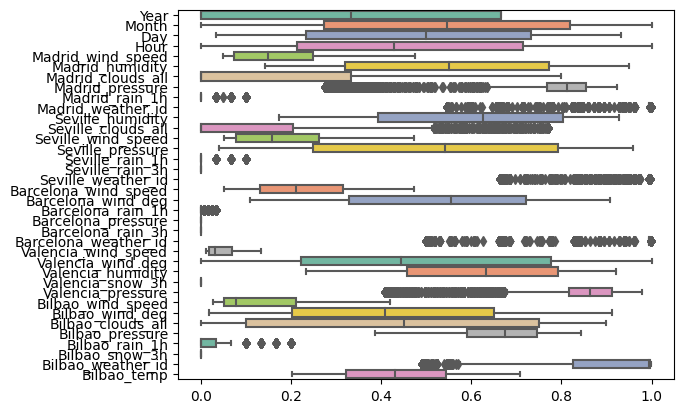

In [ ]:
sns.boxplot(data=X, orient="h", palette="Set2")

In [ ]:
X = pd.concat([X, Y], axis=1)
X.shape

(8763, 37)

In [ ]:
# # ### handling outliers by removing them
# col = X.copy()
# col = col.drop(['load_shortfall_3h'], axis=1)
# for i in col.columns:
# # Calculate the IQR for a specific column
#     Q1 = X[i].quantile(0.25)
#     Q3 = X[i].quantile(0.75)
#     IQR = Q3 - Q1

# # Set a threshold
#     threshold = 1.5
# # Filter and remove outliers from the DataFrame
#     X = X[(X[i] >= Q1 - threshold * IQR) & (X[i] <= Q3 + threshold * IQR)]

# X.shape
# X.head()


In [ ]:

# ###Accesing train data
# X = Train[:len(traindf)]
# x_test = Train[len(traindf):]
# Y  = df[:len(traindf)][['load_shortfall_3h']]



# X.tail()
# X.shape
Y = X[['load_shortfall_3h']]
X = X.drop(['load_shortfall_3h'], axis=1)
X.shape



(8763, 36)

In [ ]:
Y.shape

(8763, 1)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Create a GradientBoost regressor
gb_regressor = GradientBoostingRegressor()

# Create an RFE object with the GradientBoost regressor and specify the number of features to select
rfe = RFE(estimator=gb_regressor, n_features_to_select = 30)  # Replace '10' with the desired number of features

# Fit the RFE object to the data
rfe.fit(X, Y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)
X = X[selected_features]
x_test = x_test[selected_features]

C:\Users\lefak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lefak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lefak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

Selected Features:
Index(['Year', 'Month', 'Day', 'Hour', 'Madrid_wind_speed', 'Madrid_humidity',
       'Madrid_clouds_all', 'Madrid_pressure', 'Madrid_weather_id',
       'Seville_humidity', 'Seville_clouds_all', 'Seville_wind_speed',
       'Seville_pressure', 'Seville_weather_id', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Barcelona_rain_1h', 'Barcelona_pressure',
       'Barcelona_weather_id', 'Valencia_wind_speed', 'Valencia_wind_deg',
       'Valencia_humidity', 'Valencia_pressure', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Bilbao_clouds_all', 'Bilbao_pressure',
       'Bilbao_rain_1h', 'Bilbao_weather_id', 'Bilbao_temp'],
      dtype='object')


In [ ]:
X.columns


Index(['Year', 'Month', 'Day', 'Hour', 'Madrid_wind_speed', 'Madrid_humidity',
       'Madrid_clouds_all', 'Madrid_pressure', 'Madrid_weather_id',
       'Seville_humidity', 'Seville_clouds_all', 'Seville_wind_speed',
       'Seville_pressure', 'Seville_weather_id', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Barcelona_rain_1h', 'Barcelona_pressure',
       'Barcelona_weather_id', 'Valencia_wind_speed', 'Valencia_wind_deg',
       'Valencia_humidity', 'Valencia_pressure', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Bilbao_clouds_all', 'Bilbao_pressure',
       'Bilbao_rain_1h', 'Bilbao_weather_id', 'Bilbao_temp'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Scale the independent variables and create a DataFrame
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.describe()


,Year,Month,Day,Hour,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_pressure,Madrid_weather_id,Seville_humidity,...,Valencia_wind_deg,Valencia_humidity,Valencia_pressure,Bilbao_wind_speed,Bilbao_wind_deg,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_weather_id,Bilbao_temp
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,0.500285,0.502256,0.507563,0.499927,0.302327,0.500572,0.239265,0.734552,0.900190,0.556960,...,0.475154,0.551634,0.728581,0.292982,0.472995,0.481743,0.595553,0.155902,0.745021,0.464049
std,0.408027,0.313452,0.319821,0.327335,0.290566,0.314469,0.340800,0.289298,0.252838,0.317223,...,0.319738,0.298340,0.260482,0.288957,0.312957,0.359839,0.266721,0.290857,0.373607,0.283834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.222222,0.214286,0.058824,0.220264,0.000000,0.758140,0.990056,0.289855,...,0.222222,0.324324,0.714286,0.066667,0.207254,0.111111,0.443299,0.000000,0.661166,0.236128
50%,0.500000,0.545455,0.518519,0.428571,0.235294,0.506608,0.000000,0.827907,0.990056,0.599034,...,0.444444,0.578378,0.797619,0.133333,0.436269,0.500000,0.628866,0.000000,0.990099,0.454317
75%,1.000000,0.818182,0.777778,0.714286,0.470588,0.779736,0.416667,0.893023,0.992542,0.835749,...,0.777778,0.810811,0.880952,0.466667,0.706736,0.833333,0.783505,0.166667,0.995600,0.676687
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

# fig, ax = plt.subplots(figsize=(15, 15))
# sns.heatmap(X.corr(), annot=True)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the cross-validation splits
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train your machine learning model
    model = RandomForestRegressor(n_estimators = 200, max_depth = None, min_samples_split = 25 , random_state = 42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)

# Make predictions on the testing set
    y_test_pred = model.predict(X_test)

# Evaluate the model
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate R-squared for the testing set
    r2 = r2_score(y_test, y_test_pred)


# Print the root mean squared error (RMSE) for training and testing data
    print("Training RMSE:", train_rmse)
    print("Testing RMSE:", test_rmse)
    print("R-squared:", r2) 

C:\Users\lefak\AppData\Local\Temp\ipykernel_15740\2614477506.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training RMSE: 0.05778357179662799
Testing RMSE: 0.081846191525797
R-squared: 0.5947643851795171


C:\Users\lefak\AppData\Local\Temp\ipykernel_15740\2614477506.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training RMSE: 0.058045763700712606
Testing RMSE: 0.07832838806982172
R-squared: 0.6174310768196216


C:\Users\lefak\AppData\Local\Temp\ipykernel_15740\2614477506.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training RMSE: 0.05764350398988943
Testing RMSE: 0.07988632520771646
R-squared: 0.6038236960216727


C:\Users\lefak\AppData\Local\Temp\ipykernel_15740\2614477506.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training RMSE: 0.05772453299452024
Testing RMSE: 0.08136720638263399
R-squared: 0.5789358515002954


C:\Users\lefak\AppData\Local\Temp\ipykernel_15740\2614477506.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training RMSE: 0.05830709687093198
Testing RMSE: 0.08061663433288886
R-squared: 0.5939016900791698


In [ ]:
# X_train, X_test = X.iloc[train_index], X.iloc[test_index]
# y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

#     # Train your machine learning model
# model = RandomForestRegressor(n_estimators = 200, max_depth = None, min_samples_split = 25 , random_state = 42)
# model.fit(X_train, y_train)

# y_train_pred = model.predict(X_train)

# # Make predictions on the testing set
# y_test_pred = model.predict(X_test)

# # Evaluate the model
# train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
# test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# # Calculate R-squared for the testing set
# r2 = r2_score(y_test, y_test_pred)

# ##
# # Get the feature importances
# importances = model.feature_importances_

# feature_names = X_train.columns  # your feature names (e.g., column names of your dataset)

# # Print the feature names and importances
# # for feature_name, importance in zip(feature_names, importances):
# #     print(f"Feature: {feature_name}, Importance: {importance}")

# # Sort and rank the features by importance
# sorted_indices = np.argsort(importances)[::-1]
# for i in sorted_indices:
#     print(f"{feature_names[i]} : {importances[i]}")
# ##

# # Print the root mean squared error (RMSE) for training and testing data
# print()
# print("Training RMSE:", train_rmse)
# print("Testing RMSE:", test_rmse)
# print("R-squared:", r2) 

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the cross-validation splits
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train your machine learning model
    modeltree = tree.DecisionTreeRegressor(max_depth=None, min_samples_split=300, random_state=42)
    modeltree.fit(X_train, y_train)

    y_train_pred = modeltree.predict(X_train)

# Make predictions on the testing set
    y_test_pred = modeltree.predict(X_test)

    # 
    importances = modeltree.feature_importances_
    # 

# Evaluate the model
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate R-squared for the testing set
    r2 = r2_score(y_test, y_test_pred)

# Print the root mean squared error (RMSE) for training and testing data
    print()
    print("Training RMSE:", train_rmse)




    print("Testing RMSE:", test_rmse)
    print("R-squared:", r2)


Training RMSE: 0.09638161604062126
Testing RMSE: 0.10306572376532322
R-squared: 0.3574022942602333

Training RMSE: 0.09597922134671323
Testing RMSE: 0.09748126956564651
R-squared: 0.407465470768156

Training RMSE: 0.09641121679993866
Testing RMSE: 0.09951638933956691
R-squared: 0.38520145758420754

Training RMSE: 0.09733358459193521
Testing RMSE: 0.10193751858214213
R-squared: 0.3391276693285685

Training RMSE: 0.09679065701667801
Testing RMSE: 0.10030495772280719
R-squared: 0.3713243277688122


In [ ]:


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the cross-validation splits
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train your machine learning model
    modelGB = GradientBoostingRegressor(n_estimators=100, max_depth = 7 , random_state= 15,max_features="sqrt")
    modelGB.fit(X_train, y_train)

    y_train_pred = modelGB.predict(X_train)

# Make predictions on the testing set
    y_test_pred = modelGB.predict(X_test)

    #
    importances = modelGB.feature_importances_
    #

# Evaluate the model
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate R-squared for the testing set
    r2 = r2_score(y_test, y_test_pred) 

# Print the root mean squared error (RMSE) for training and testing data
    print()
    print("Training RMSE:", train_rmse)
    print("Testing RMSE:", test_rmse)
    print("R-squared:", r2)

C:\Users\lefak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training RMSE: 0.042071096860469434
Testing RMSE: 0.0783834059309888
R-squared: 0.6283287938037295


C:\Users\lefak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training RMSE: 0.04237823317718284
Testing RMSE: 0.07575472748490877
R-squared: 0.6421584300526126


C:\Users\lefak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training RMSE: 0.041838118726772275
Testing RMSE: 0.07707435220835857
R-squared: 0.6312233840992685


C:\Users\lefak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training RMSE: 0.041706825656151414
Testing RMSE: 0.07808234384213078
R-squared: 0.6122470265993486


C:\Users\lefak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training RMSE: 0.04236416449425875
Testing RMSE: 0.07625055792042537
R-squared: 0.6366979002709536


In [ ]:


# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_standardise = pd.DataFrame(X_scaled,columns=X.columns)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_standardise, Y, test_size=0.2, random_state=42)

# modelRidge = Ridge()
# # Fit the model to the training data
# modelRidge.fit(X_train, y_train)

# # Make predictions on the training set
# y_train_pred = modelRidge.predict(X_train)

# # Make predictions on the testing set
# y_test_pred = modelRidge.predict(X_test)

# # Evaluate the model
# train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
# test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)



# # Calculate R-squared for the testing set
# r2 = r2_score(y_test, y_test_pred)

# # Print the root mean squared error (RMSE) for training and testing data
# print("Training RMSE:", train_rmse)
# print("Testing RMSE:", test_rmse)
# print("R-squared:", r2)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_standardise, Y, test_size=0.2, random_state=42)

# modelLasso = Lasso(alpha=0.1, fit_intercept=True, max_iter=1000, tol=0.0001)
# # Fit the model to the training data
# modelLasso.fit(X_train, y_train)

# # Make predictions on the training set
# y_train_pred = modelLasso.predict(X_train)

# # Make predictions on the testing set
# y_test_pred = modelLasso.predict(X_test)

# # Evaluate the model
# train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
# test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)



# # Calculate R-squared for the testing set
# r2 = r2_score(y_test, y_test_pred)

# # Print the root mean squared error (RMSE) for training and testing data
# print("Training RMSE:", train_rmse)
# print("Testing RMSE:", test_rmse)
# print("R-squared:", r2)

# Testing

In [ ]:
pred = modelGB.predict(x_test)

df2 = pd.DataFrame(pred, columns=['load_shortfall_3h'])
df2.head()

,load_shortfall_3h
0,0.460607
1,0.337061
2,0.331553
3,0.357602
4,0.408816


In [ ]:
output  = pd.DataFrame({'time': testdf['time'], 'load_shortfall_3h': df2['load_shortfall_3h']})
output.head()
output.to_csv('Submission.csv', index=False)